In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("train_ctrUa4K.csv")
df.head(10).style.applymap(lambda x : "background-color: #f5e9f2")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.000000,360.000000,1.000000,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.000000,360.000000,1.000000,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.000000,360.000000,0.000000,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.000000,360.000000,1.000000,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.000000,360.000000,1.000000,Semiurban,N


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
print('\033[1m' + 'Shape of the data (rows, columns):' + '\033[0m')
print(df.shape)

Shape of the data (rows, columns):
(614, 13)


In [5]:
for col in df.columns:
    print('\033[1m' + 'Unique values in {} :'.format(col) + '\033[0m',len(df[col].unique()))

Unique values in Loan_ID : 614
Unique values in Gender : 3
Unique values in Married : 3
Unique values in Dependents : 5
Unique values in Education : 2
Unique values in Self_Employed : 3
Unique values in ApplicantIncome : 505
Unique values in CoapplicantIncome : 287
Unique values in LoanAmount : 204
Unique values in Loan_Amount_Term : 11
Unique values in Credit_History : 3
Unique values in Property_Area : 3
Unique values in Loan_Status : 2


In [6]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        table = pd.concat([mis_val, mis_val_percent], axis=1)

        col_names = table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        col_names= col_names[col_names.iloc[:,1] != 0].sort_values('% of Total Values',
                                                                   ascending=False).round(1)
        
        print ("Dataframe has " + str(df.shape[1]) + " columns,"      
            "And there exist " + str(col_names.shape[0]) +
              " columns missing value(s)")
        
        return col_names
    
summary=missing_values_table(df)
summary

Dataframe has 13 columns,And there exist 7 columns missing value(s)


,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


<Axes: >

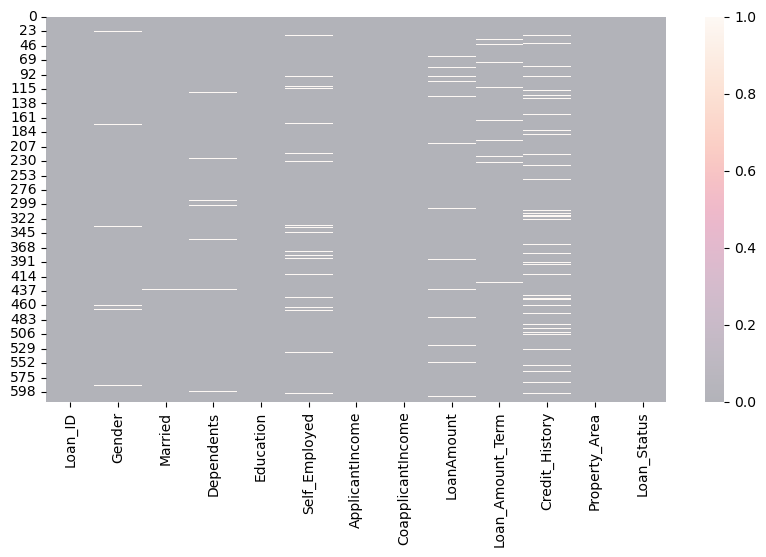

In [11]:
plt.figure(figsize=(10,5) , dpi=100)
sns.heatmap(df.isna(), alpha = 0.3)

In [13]:
print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
print(df.duplicated().sum())

Number of duplicate values :
0


<Axes: xlabel='Credit_History', ylabel='Count'>

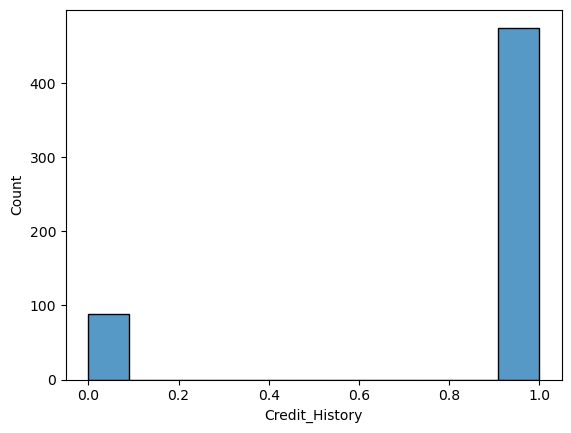

In [27]:
sns.histplot(df.Credit_History)

## Skewed distribution + outliers

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

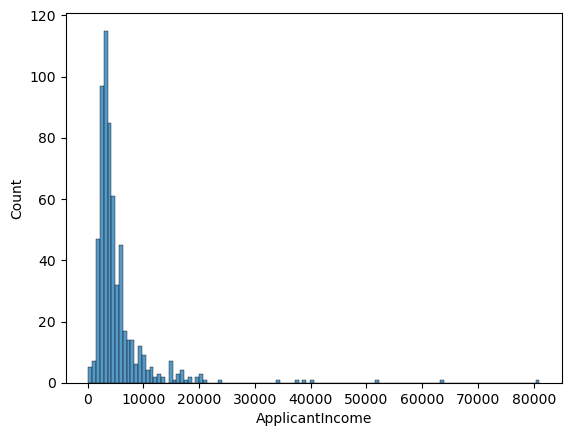

In [24]:
sns.histplot(df.ApplicantIncome)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

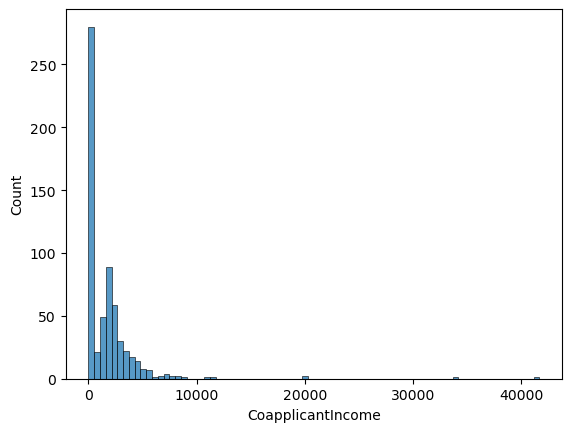

In [25]:
sns.histplot(df.CoapplicantIncome)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

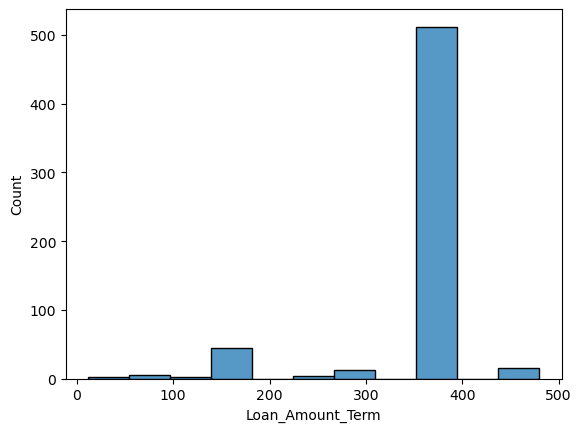

In [26]:
sns.histplot(df.Loan_Amount_Term)

## Balanced target variable ?

<Axes: xlabel='Loan_Status', ylabel='Count'>

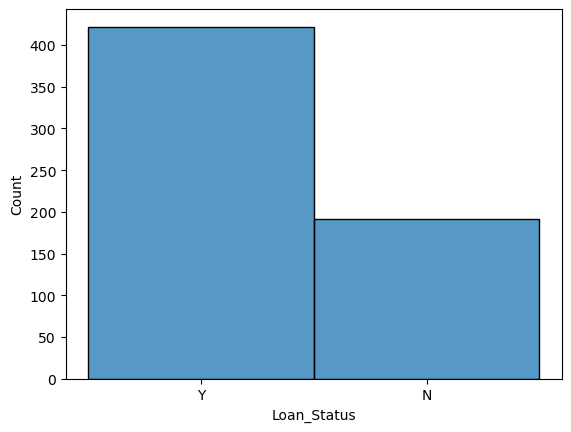

In [28]:
sns.histplot(df.Loan_Status)

## Encode categorical variables

In [32]:
# Columns to one-hot encode
columns_to_encode = ['Gender', 'Married', 'Education','Self_Employed','Property_Area','Loan_Status']

df_encoded = pd.get_dummies(df, columns=columns_to_encode)
df_encoded.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,1,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,0,1


## Correlation Analysis

C:\Users\sarah\AppData\Local\Temp\ipykernel_27016\888858947.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

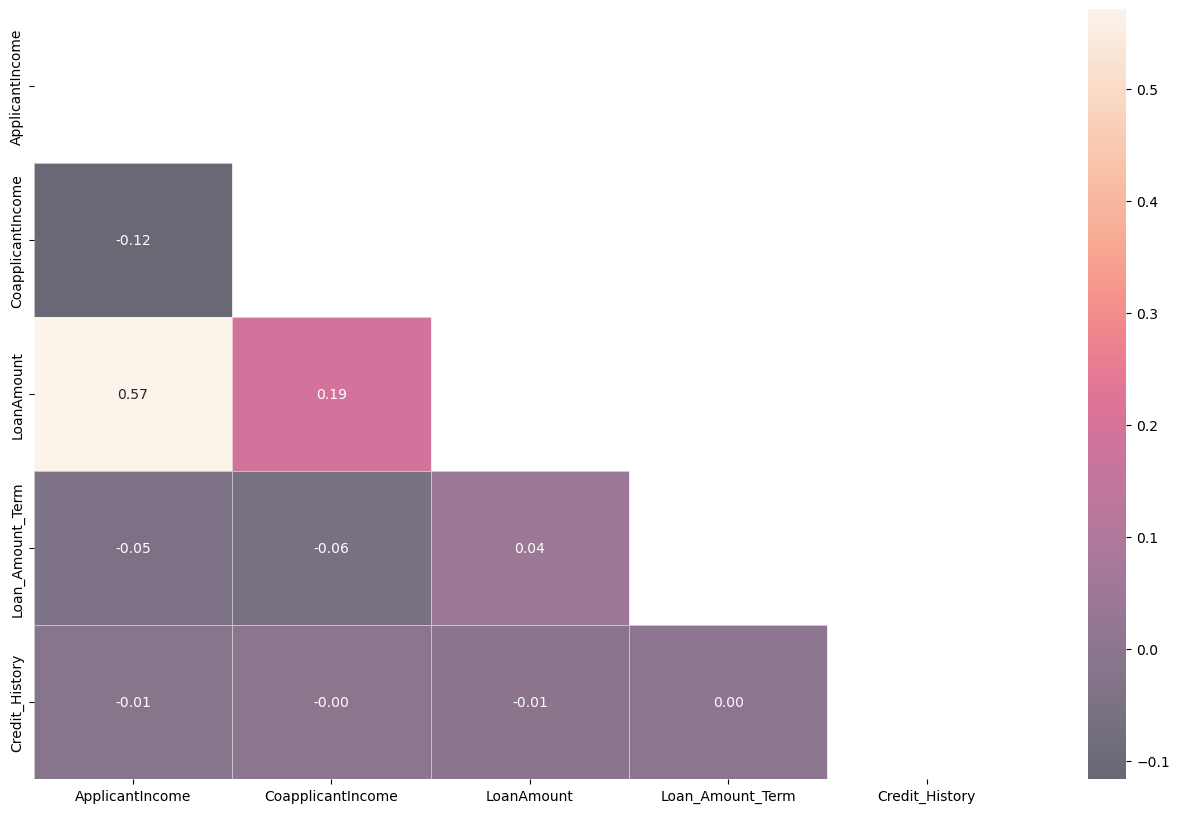

In [34]:
plt.figure(figsize = (16, 10), dpi = 100)

corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot = True , linewidths = 0.5 , fmt = ".2f" , alpha = 0.6)